<a href="https://colab.research.google.com/github/DiegoRenaud/ML-2A/blob/main/TD4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TD 4**

In [3]:
import pandas as pd
import numpy as np

# Import des données
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data
y = target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

In [4]:
# Training d'un arbe de décision
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

**Question 1)**

In [25]:
# Fonction résumé de l'arbre de décision
def tree_summary(dt):
  
  # Score de Test and Train
  print("Train score :",dt.score(X_train, y_train))
  print("Test score :",dt.score(X_test, y_test))
  
  # Depth function
  print("Depth :",dt.tree_.max_depth)
 
  # Node Count function
  print("Noce Count : ",dt.tree_.node_count)

In [24]:
tree_summary(dt)

Train score : 1.0
Test score : 0.8326570877247362
Depth : 17
Noce Count :  715


On remarque que le Train Score est de 1: on a un léger problème d'**overfitting**. C'est le gros problème avec les Decision Tree.

**Question 2)**

In [29]:
# On crée un nouvel arbre de décision avec une profondeure maximale égale à 3.
dt2 = DecisionTreeRegressor(random_state=0, max_depth = 3).fit(X_train,y_train)
tree_summary(dt2)

Train score : 0.8160045697821083
Test score : 0.7311557939115028
Depth : 3
Noce Count :  15


On règle de façon significative notre problème d'overfitting en capant la profondeure de notre arbre.

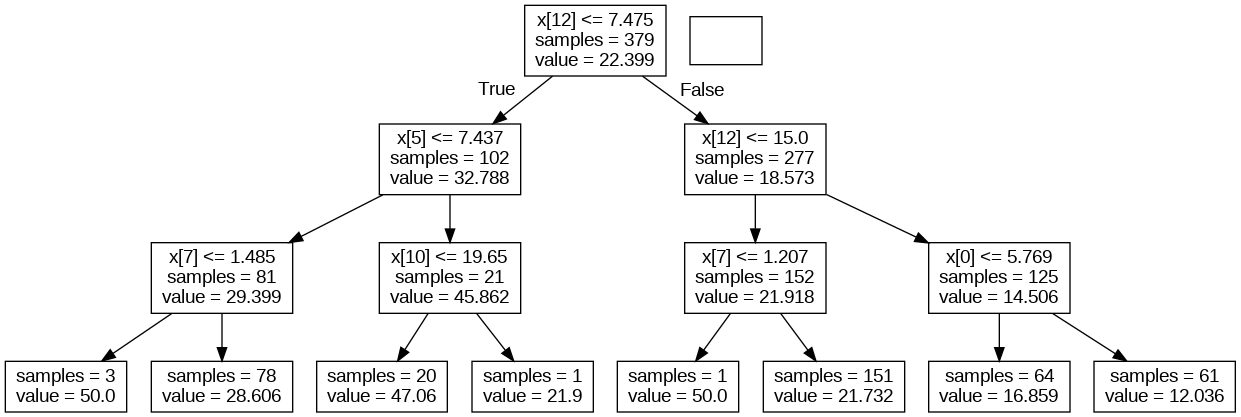

In [30]:
# Visualisation arbre dt2
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

foo = StringIO()
export_graphviz(dt2,out_file=foo,impurity=False)
graph = graph_from_dot_data(foo.getvalue())
Image(graph.create_png())

**Question 3)**

Les variables explicatives sont **X0, X7, X10 et X12**

**Question 4)**

In [43]:
# Recherche du meilleur paramêtre pour la profondeure maximale avec une 10-validation croisée
from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": range(1,17)}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6)

**Question 5)**

In [61]:
#Fonction R²
def r2_score(y_true, y_predict):
  N = len(y_true)
  u = 0
  for i in range(N):
    u = u + y_true[i]
  u = 1/N*u
  S = 0
  K = 0 
  for j in range(N):
    S = S + (y_true[j]-y_predict[j])**2
    K = K + (y_true[j]-u)**2
  return print('R² =', 1-(S/K))


In [62]:
y_predict = dt2.predict(X_test)
r2_score(y_test, y_predict)

R² = 0.7311557939115026


In [65]:
# 2ème fonction R²
def r2_score_V2(y, y_pred):
  ymean = y.mean()
  return 1 - ((y - y_pred)**2).sum()/((y-ymean(y))**2).sum()